## Dataset and Problem Introduction

In this analysis, we explore exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)}) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. We are interested in finding out if employees who only worked for the institutes for a short period of time are resigning due to some kind of dissatisfaction.

Data Source:
- https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey
- https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

<br>Reference: https://dataquest.io/

In [1]:
#Read in the data
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('datasets/dete_survey.csv')

#Quick exploration of the data
pd.options.display.max_columns = 150 # to avoid truncated output 
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
#Read in the data
tafe_survey = pd.read_csv("datasets/tafe_survey.csv")

#Quick exploration of the data
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

## Initial Observations
  - The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
  - Both the `dete_survey` and `tafe_survey` contain many columns that we don't need to complete our analysis.
  - Each dataframe contains many of the same columns, but the column names are different.
  - There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Data Cleaning and Filtering

- Correct the `Not Stated` values.
- Drop columns not needed for analysis.
- Standardize the names of some of the columns so we can combine the dataframes.
- Filter the data so we only analyse survey respondents who *resigned*.
- Convert year data to float.

In [5]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Remove columns we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Update column names to match the names in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

## Adding a New Column

We need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

The `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`.

We create a new column named `institute_service`, which is calculated from the years of service in the `dete_survey_updated` dataframe by subtracting the `dete_start_date` from `cease_date`.

In [6]:
# Calculate the length of time an employee spent in their respective workplace and create a new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Identifying Dissatisfied Employees
We use the following columns to categorise employees as "dissatisfied":

   1. tafe_survey_updated:
       - `Contributing Factors. Dissatisfaction`
       - `Contributing Factors. Job Dissatisfaction`
   2.  dafe_survey_updated:
       - `job_dissatisfaction`
       - `dissatisfaction_with_the_department`
       - `physical_work_environment`
       - `lack_of_recognition`
       - `lack_of_job_security`
       - `work_location`
       - `employment_conditions`
       - `work_life_balance`
       - `workload`
    
If the employee indicated any of the factors above caused them to resign, we mark them as `dissatisfied` in a new column. After our changes, the new `dissatisfied` column contains the following values:

   - `True`: indicates a person resigned because they were dissatisfied in some way.
   - `False`: indicates a person resigned because of a reason other than dissatisfaction with the job.
   - `NaN`: indicates the value is missing.

In [7]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

In [8]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

## Cleaning the Service Column 
Now we clean the `institute_service` column and categorise employees according to the following definitions:

 - New: Less than 3 years in the workplace.
 - Experienced: 3-6 years in the workplace.
 - Established: 7-10 years in the workplace.
 - Veteran: 11 or more years in the workplace.
 
Our analysis is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [9]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Analysis 
Finally, we replace the missing values in the `dissatisfied` column with the most frequent value, `False`. Then, we calculate the percentage of employees who resigned due to dissatisfaction in each `service_cat` group and plot the results.

<AxesSubplot:title={'center':'Dissatisfaction by Career Stage'}, xlabel='service_cat'>

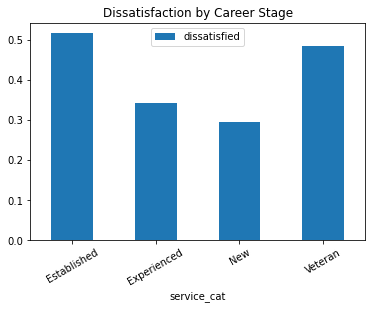

In [10]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30, title='Dissatisfaction by Career Stage')

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.

## How many people in each career stage resigned due to some kind of dissatisfaction?

In [11]:
diss_count = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied', aggfunc='sum')
diss_count = diss_count.sort_values(by=['dissatisfied'])
diss_count = diss_count.rename(columns={'dissatisfied':'dissatisfied_count'})
diss_count

,dissatisfied_count
service_cat,
Established,32
New,57
Experienced,59
Veteran,66


## Dissatisfaction by age

In order to analyse the age data, we divide the age groups as follows:

- 20s
- 30s
- 40s
- 50s
- 60+

<AxesSubplot:title={'center':'Dissatisfaction by Age'}, ylabel='age'>

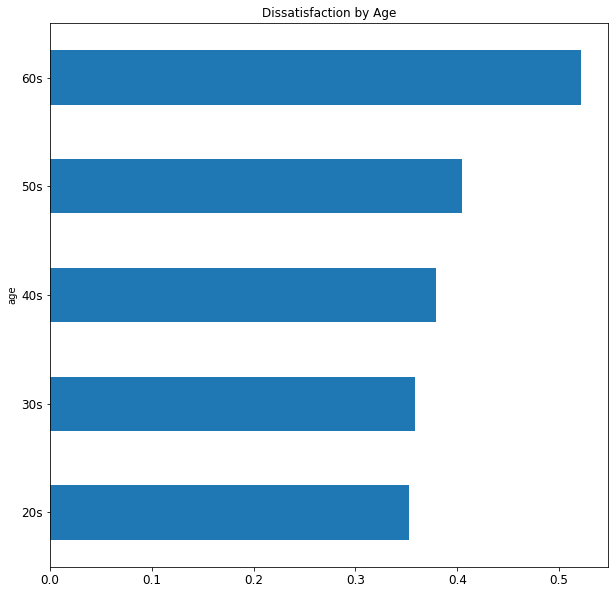

In [12]:
combined_updated['age'] = combined_updated['age'].astype('str')

def age(s):
    if s[0] == '2':
        return '20s'
    elif s[0] == '3':
        return '30s'
    elif s[0] == '4':
        return '40s'
    elif s[0] == '5':
        return '50s'
    elif s[0] == '6':
        return '60s'
    elif s == 'nan':
        return np.nan

combined_updated['age'] = combined_updated['age'].apply(age)
age_diss_count = pd.pivot_table(combined_updated, index='age', values='dissatisfied', aggfunc='sum')
age_diss_count = age_diss_count.sort_values(by=['dissatisfied'])
age_diss_count = age_diss_count.rename(columns={'dissatisfied': 'dissatisfied_count'})

age_perc = pd.pivot_table(combined_updated, index='age', values='dissatisfied')
age_perc = age_perc.sort_values(by=['dissatisfied'])
age_perc.plot(kind='barh', legend=False, figsize=(10,10), fontsize=12, title='Dissatisfaction by Age')

Overall, the number of young employees of the two institutes who resigned due to job dissatisfaction is the lowest. This might be due to the fact that they were early in their career development and were still looking for a career path to follow.

## Dissatisfaction by Institute

<AxesSubplot:title={'center':'Dissatisfaction by Institute'}, xlabel='institute'>

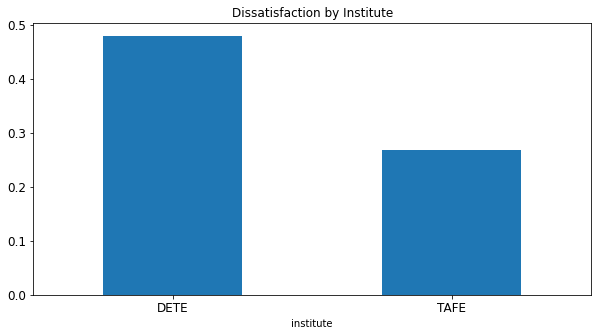

In [13]:
institute_count = pd.pivot_table(combined_updated, index='institute', values='dissatisfied', aggfunc='sum')
institute_count = institute_count.rename(columns={'dissatisfied': 'dissatisfied_count'})

by_perc = pd.pivot_table(combined_updated, index='institute', values='dissatisfied')
by_perc.plot(kind='bar', rot=360, figsize=(10,5), fontsize=12, legend=False,title='Dissatisfaction by Institute')

It appears that DETE employees have resigned due to job dissatisfaction more often than TAFE employees.

## Dissatisfaction by Gender

<AxesSubplot:title={'center':'Dissatisfaction by Gender'}, xlabel='gender'>

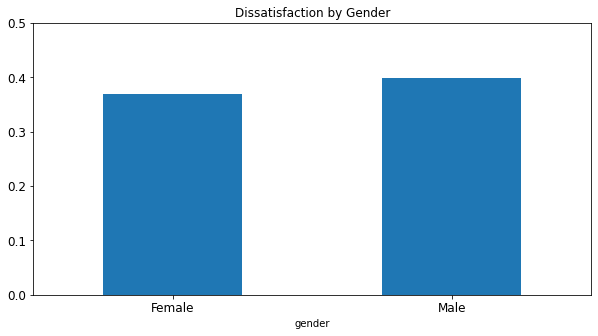

In [14]:
by_gender = pd.pivot_table(combined_updated, index='gender', values='dissatisfied')
by_gender.plot(kind='bar', rot=360, figsize=(10,5), fontsize=12, ylim=[0, 0.5], legend=False,title='Dissatisfaction by Gender')

## Dissatisfaction by Employment Status

<AxesSubplot:title={'center':'Dissatisfaction by Employment Status'}, ylabel='employment_status'>

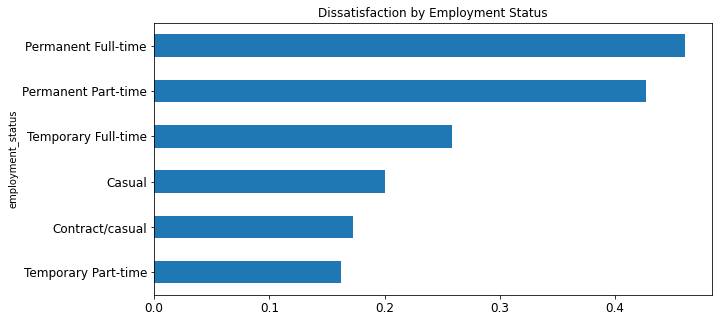

In [15]:
by_status = pd.pivot_table(combined_updated, index='employment_status', values='dissatisfied')
by_status = by_status.sort_values(by=['dissatisfied'])
by_status.plot(kind='barh', figsize=(10,5), fontsize=12, legend=False,title='Dissatisfaction by Employment Status')

## Dissatisfaction by Position

<AxesSubplot:title={'center':'Dissatisfaction by Position'}, ylabel='position'>

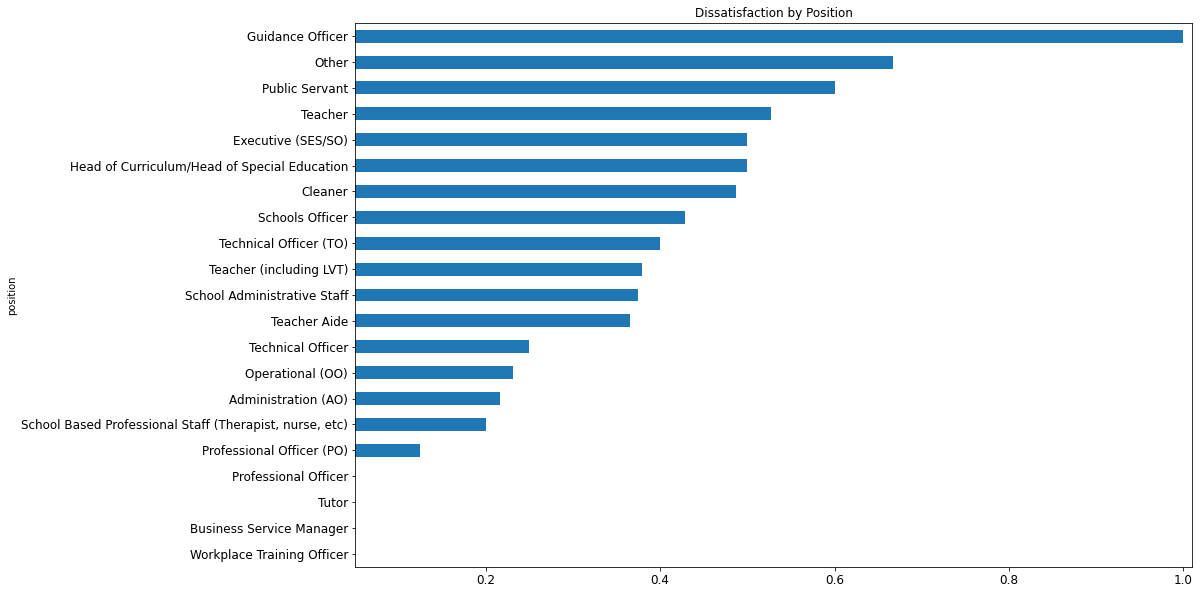

In [16]:
by_position = pd.pivot_table(combined_updated, index='position', values='dissatisfied')
by_position = by_position.sort_values(by=['dissatisfied'])
by_position.plot(kind='barh', figsize=(15, 10), fontsize=12, legend=False, xlim=[0.05, 1.01],title='Dissatisfaction by Position')

## Dissatisfaction by Age and Gender

<AxesSubplot:title={'center':'Dissatisfaction by Age and Gender'}, ylabel='gender,age'>

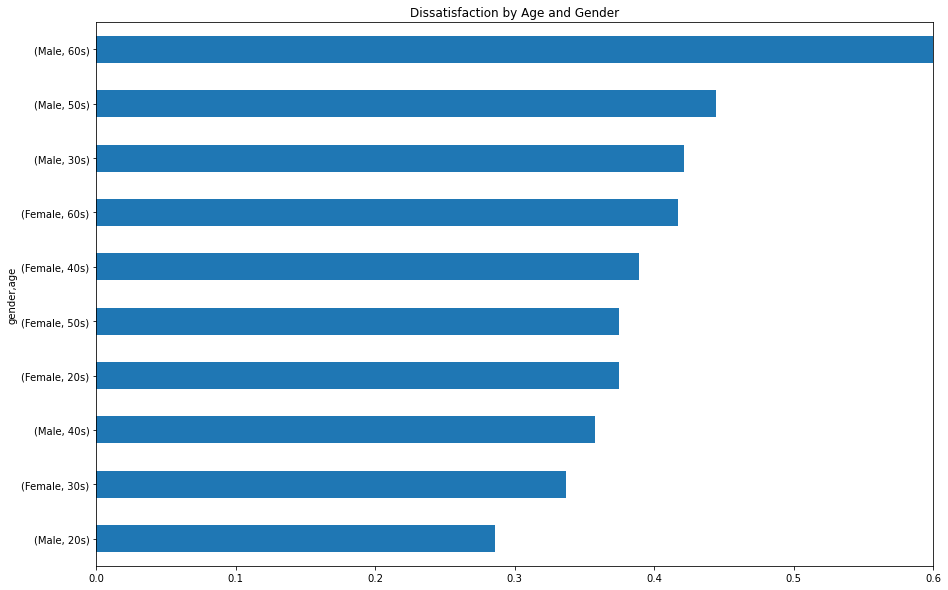

In [17]:
gender_age = pd.pivot_table(combined_updated, index=['gender', 'age'], values='dissatisfied')
gender_age = gender_age.sort_values(by=['dissatisfied'])
gender_age.plot(kind='barh', figsize=(15, 10), legend=False, xlim=[0, 0.60],title='Dissatisfaction by Age and Gender')

## Dissatisfaction by Age and Employment Status

<AxesSubplot:title={'center':'Dissatisfaction by Age and Employment Status'}, ylabel='employment_status,age'>

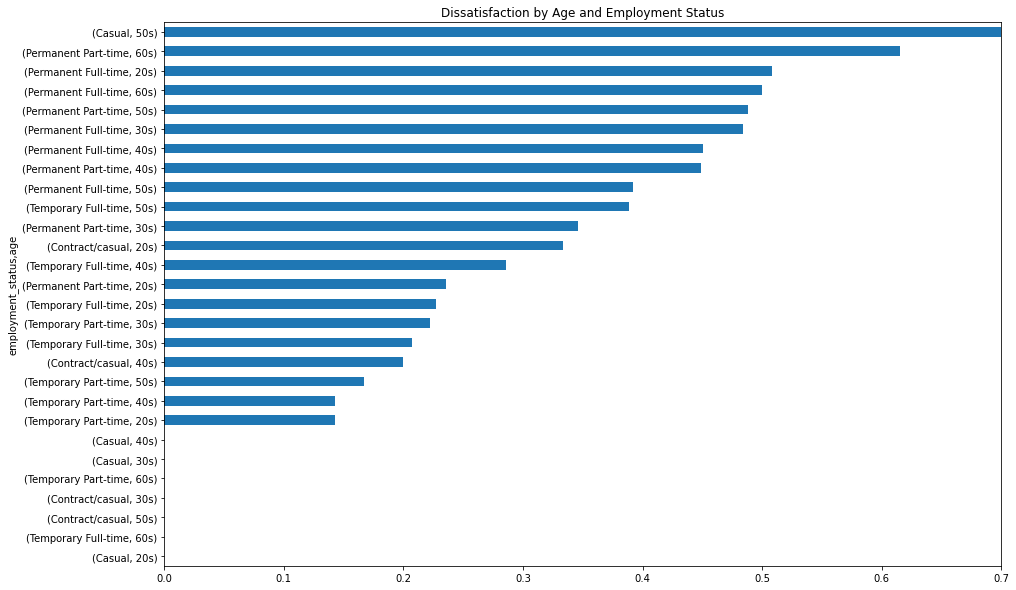

In [18]:
status_age = pd.pivot_table(combined_updated, index=['employment_status', 'age'], values='dissatisfied')
status_age = status_age.sort_values(by=['dissatisfied'])
status_age.plot(kind='barh', figsize=(15, 10), legend=False, xlim=[0, 0.7],title='Dissatisfaction by Age and Employment Status')

## Conclusion

In this project, we analysed the exit surveys of employees of the DETE and TAFE institutes. We focused on those who resigned due to some sort of job dissatisfaction and concluded that:
- Young, inexperienced employees resigned least often due to job dissatisfaction.
- DETE employees resigned more often due to job dissatisfaction than TAFE employees.
- Male employees resigned more often due to job dissatisfaction than female employees.
- Males in their 20s resigned due to dissatisfaction the least often.
- All of the resigned guidance officers who filled in the surveys resigned due to dissatisfaction.